In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../science.mplstyle")

import pickle

from helpers.plotting import *


In [34]:
project_id = "BSM" #"lowmass"

path_to_compiled_data = f"/global/cfs/cdirs/m3246/rmastand/dimuonAD/compiled_data/{project_id}"

codes_list = ["BSM_XYY_jet", "BSM_HAA_jet", "SM_SIM_jet"]#["DATA_nojet"]

uncut_data = {}
for code in codes_list:
    with open(f"{path_to_compiled_data}/{code}", "rb") as ifile:
        uncut_data[code] = pickle.load(ifile)
    
    
    print(code, list(uncut_data[codes_list[0]].keys()), uncut_data[code][list(uncut_data[code].keys())[0]].shape)
 
vars_to_plot = list(uncut_data[codes_list[0]].keys())

BSM_XYY_jet ['mu0_iso03', 'mu1_iso03', 'mu0_eta', 'mu1_eta', 'mu0_pt', 'mu1_pt', 'mu0_phi', 'mu1_phi', 'mu0_iso04', 'mu1_iso04', 'dimu_pt', 'dimu_eta', 'dimu_phi', 'n_muons', 'n_jets', 'dimu_mass', 'hardest_jet_btag', 'hardest_jet_pt', 'hardest_jet_eta', 'hardest_jet_phi', 'hardest_jet_mass', 'mu0_iso03_samesign', 'mu1_iso03_samesign', 'mu0_eta_samesign', 'mu1_eta_samesign', 'mu0_pt_samesign', 'mu1_pt_samesign', 'mu0_phi_samesign', 'mu1_phi_samesign', 'mu0_iso04_samesign', 'mu1_iso04_samesign', 'dimu_pt_samesign', 'dimu_eta_samesign', 'dimu_phi_samesign', 'n_muons_samesign', 'n_jets_samesign', 'dimu_mass_samesign', 'hardest_jet_btag_samesign', 'hardest_jet_pt_samesign', 'hardest_jet_eta_samesign', 'hardest_jet_phi_samesign', 'hardest_jet_mass_samesign', 'mumu_deltaR', 'mumu_deltapT', 'dimujet_deltaR', 'mumu_deltaR_samesign', 'mumu_deltapT_samesign', 'dimujet_deltaR_samesign'] (9509,)
BSM_HAA_jet ['mu0_iso03', 'mu1_iso03', 'mu0_eta', 'mu1_eta', 'mu0_pt', 'mu1_pt', 'mu0_phi', 'mu1_phi', 

In [35]:
# small cut on jet pt (necessary for BSM_XYY)
"""
jet_pt_cut = 0
btag_cut = 0.0

dimu_M_cut_low = 0
dimu_M_cut_high = 1000000

filters_nano, filters_ed = {}, {}

for code in uncut_data.keys():
    
    filters_nano[code] = (uncut_data[code]["dijet_pt"]>jet_pt_cut)\
                        &(uncut_data[code]["jet0_btag"]>=btag_cut)\
                        &(uncut_data[code]["jet1_btag"]>=btag_cut)\
                        &(uncut_data[code]["dimu_mass"]>=dimu_M_cut_low)\
                        &(uncut_data[code]["dimu_mass"]<dimu_M_cut_high)
"""

'\njet_pt_cut = 0\nbtag_cut = 0.0\n\ndimu_M_cut_low = 0\ndimu_M_cut_high = 1000000\n\nfilters_nano, filters_ed = {}, {}\n\nfor code in uncut_data.keys():\n    \n    filters_nano[code] = (uncut_data[code]["dijet_pt"]>jet_pt_cut)                        &(uncut_data[code]["jet0_btag"]>=btag_cut)                        &(uncut_data[code]["jet1_btag"]>=btag_cut)                        &(uncut_data[code]["dimu_mass"]>=dimu_M_cut_low)                        &(uncut_data[code]["dimu_mass"]<dimu_M_cut_high)\n'

In [36]:


colors_dict = {
    "DATA_nojet":"purple", 
    "BSM_HAA_jet":"red", 
    "SM_SIM_jet":"blue",
    "BSM_XYY_jet":"orange",
    }





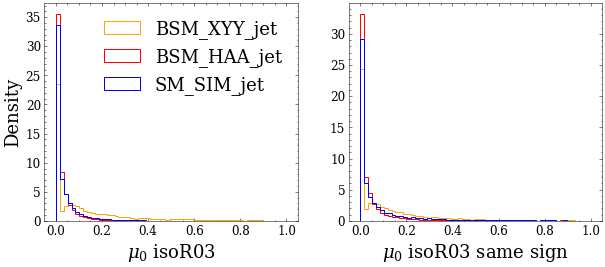

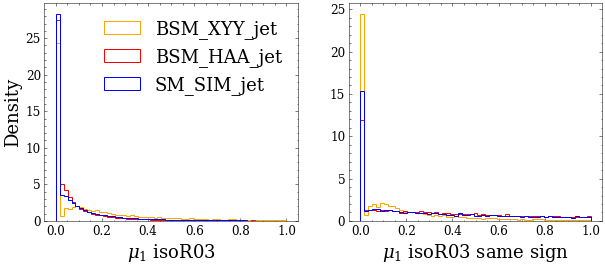

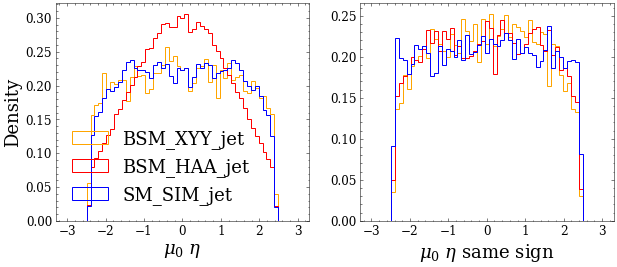

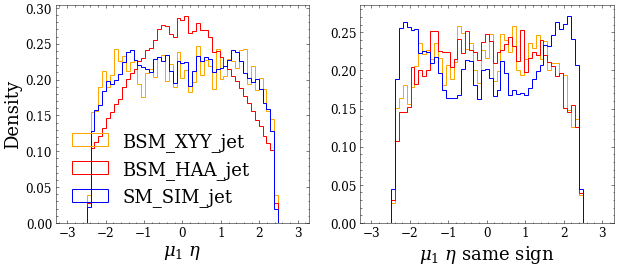

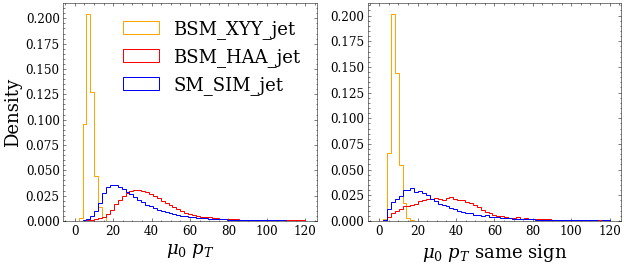

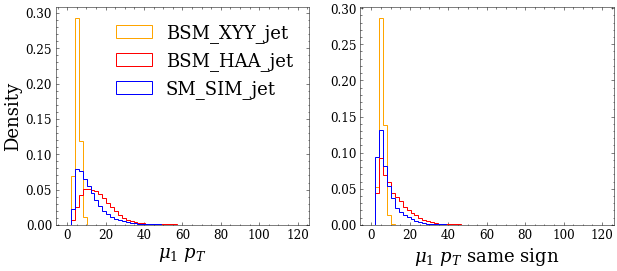

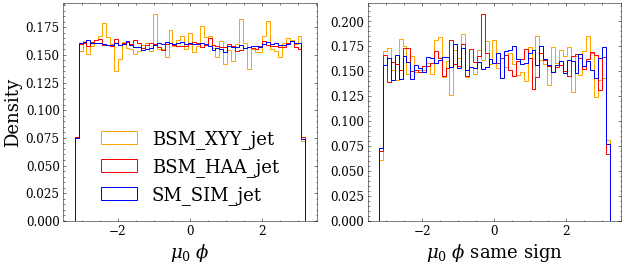

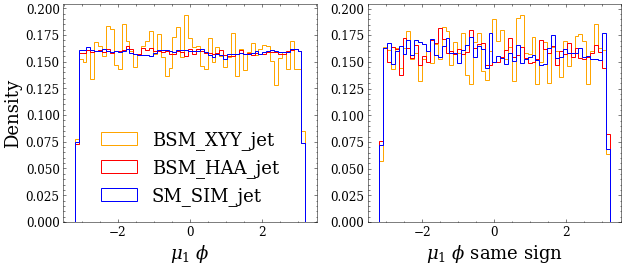

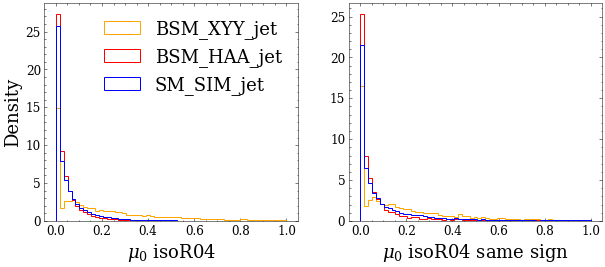

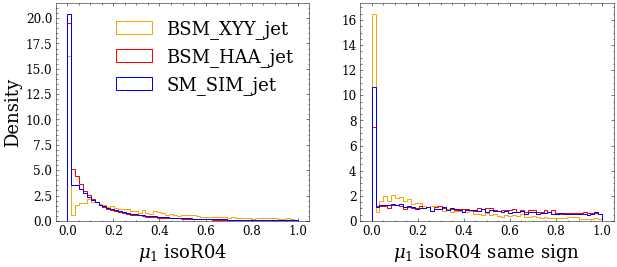

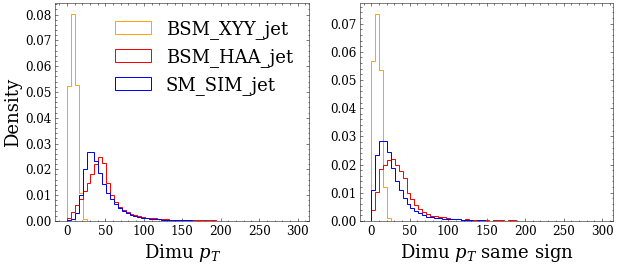

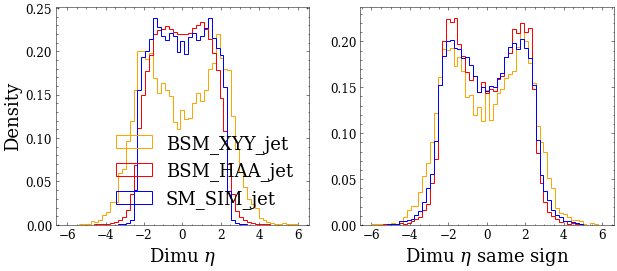

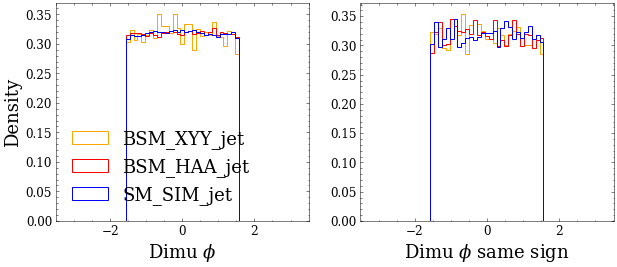

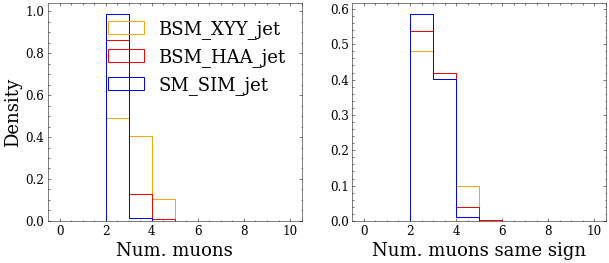

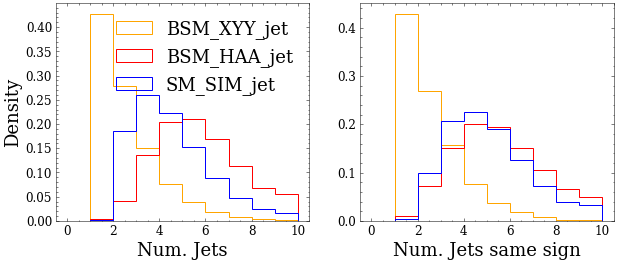

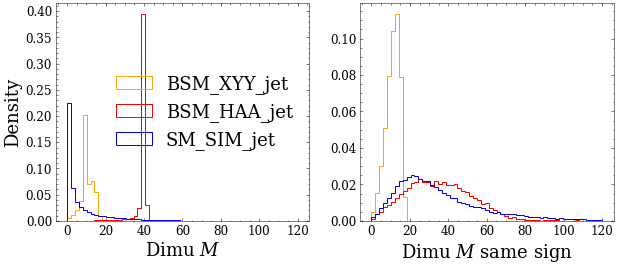

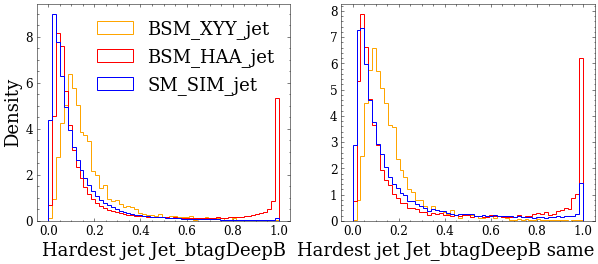

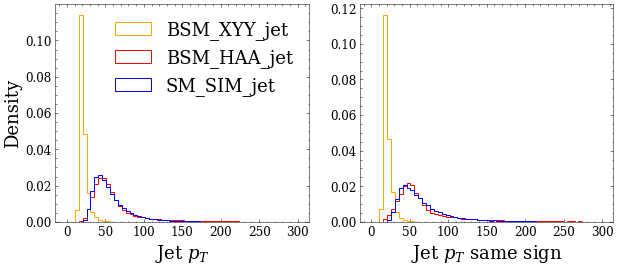

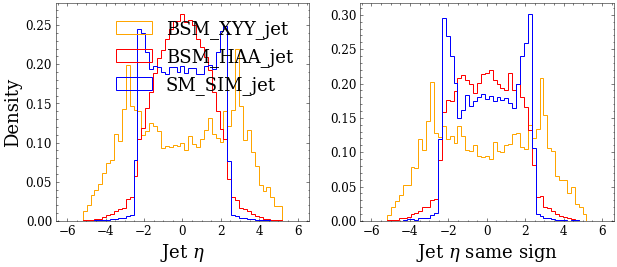

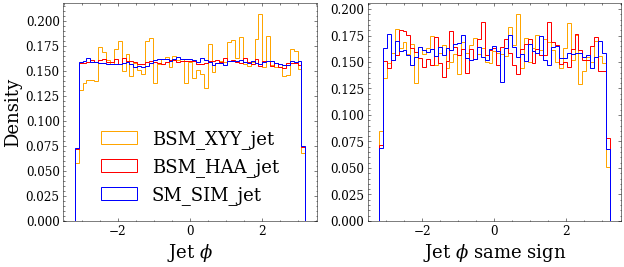

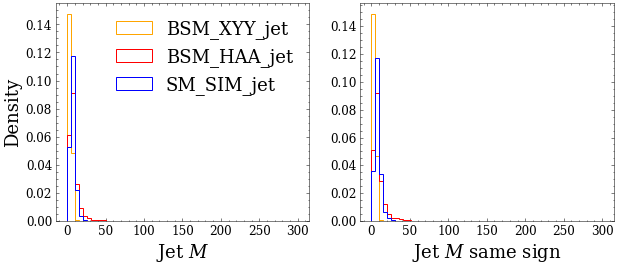

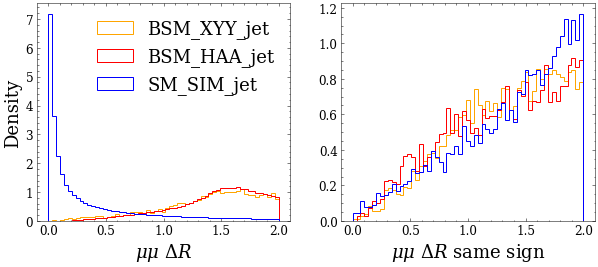

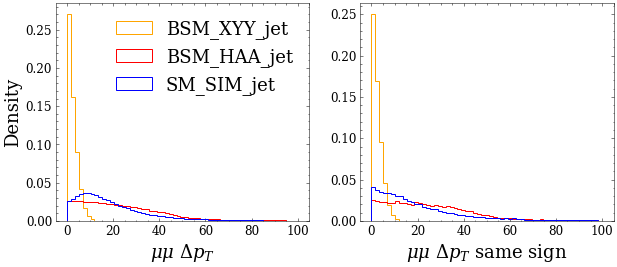

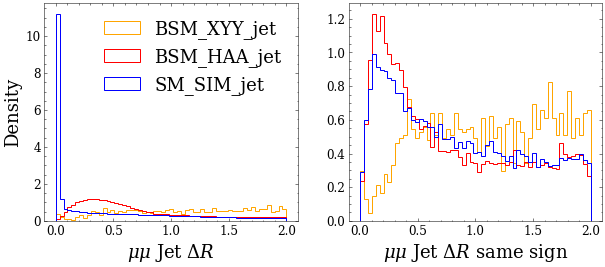

In [38]:

for var in vars_to_plot:
    
    if "samesign" not in var:
    
        fig, ax = plt.subplots(1, 2, figsize = (10, 4))

        for code in uncut_data.keys():
            
            bins = feature_bins[var]
            #bins = np.linspace(np.min(uncut_data["BSM_HAA_jet"][var]), np.max(uncut_data["BSM_HAA_jet"][var]), 40)

            ax[0].hist(uncut_data[code][var], bins = bins, histtype = "step", density = True, label = code, color = colors_dict[code])
            ax[0].set_xlabel(feature_labels[var])

            ax[1].hist(uncut_data[code][var+"_samesign"], bins = bins, histtype = "step", density = True, label = code, color = colors_dict[code])
            ax[1].set_xlabel(feature_labels[var]+" same sign")


        ax[0].set_ylabel("Density")
        ax[0].legend()
        plt.show()


Look at the Samesign muon spectru

In [7]:
analysis_type = "upsilon"

if analysis_type == "upsilon":
    mass = 9.46
elif analysis_type == "jpsi":
    mass = 3.1
elif analysis_type == "eta":
    mass = 0.547
    
lower_bound, upper_bound = mass-2, mass+1


In [8]:



plt.figure(figsize = (5,3))

plt.hist(uncut_data["DATA_nojet"]["dimu_mass"], bins = np.linspace(lower_bound, upper_bound, 50), 
        histtype = "step", label = f"+-")

plt.axvline(mass)

plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()



KeyError: 'DATA_nojet'

<Figure size 360x216 with 0 Axes>

In [ ]:
muon_iso_cuts = np.arange(0.0, 2., 0.25) # anti-isolation cut -- want muon iso to be ABOVE this, which means more junk
dimuon_pt_cuts = [0, 10, 20, 30, 40, 50, 60, 70]

isoc = 3
ptc = 0

cut_pt = True


plt.figure(figsize = (7,5))
    

if cut_pt:
    for ptc in dimuon_pt_cuts: 
        loc_filter = (uncut_data["DATA_nojet"]["muon_iso03"]>=isoc)  &(uncut_data["DATA_nojet"]["dimu_pt"]>=ptc) 
        plt.hist(uncut_data["DATA_nojet"]["dimu_mass"][loc_filter], bins = np.linspace(lower_bound, upper_bound, 40), 
                histtype = "step", 
                label = f"$\mu\mu$ $p_T$ > {round(ptc, 2)} GeV")
        if isoc > 0:
            plt.title(f"Baseline iso cut > {isoc}")

else:
    for isoc in muon_iso_cuts: 
        loc_filter = (uncut_data["DATA_nojet"]["muon_iso03"]>=isoc)  &(uncut_data["DATA_nojet"]["dimu_pt"]>=ptc) 
        plt.hist(uncut_data["DATA_nojet"]["dimu_mass"][loc_filter], bins = np.linspace(lower_bound, upper_bound, 40), 
                histtype = "step", 
                 label = f"$\mu\mu$ iso R03 > {round(isoc, 2)}")



plt.axvline(mass)
plt.yscale("log")
plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0), fontsize = 14)
plt.show()

